In [2]:
import os
import sys
import pandas as pd 
import numpy as np
from data_import import *

In [3]:
# import data
geno_df, pheno_df = import_data_svenson()

Samples:
['F326', 'F327', 'F329', 'F330', 'F331', 'F332', 'F333', 'F334', 'F335', 'F336', 'F337', 'F338', 'F339', 'F340', 'F341', 'F342', 'F343', 'F344', 'F345', 'F346', 'F347', 'F348', 'F349', 'F350', 'F351', 'F352', 'F353', 'F354', 'F355', 'F356', 'F357', 'F358', 'F359', 'F360', 'F361', 'F362', 'F363', 'F364', 'F365', 'F366', 'F367', 'F368', 'F369', 'F371', 'F372', 'F373', 'F374', 'F375', 'F376', 'F377', 'F378', 'F379', 'F380', 'F381', 'F382', 'F383', 'F384', 'F385', 'F386', 'F387', 'F388', 'F389', 'F390', 'F391', 'F392', 'F393', 'F394', 'F395', 'F396', 'F397', 'F398', 'F399', 'F400', 'F401', 'F402', 'F403', 'F405', 'F406', 'F407', 'F408', 'F410', 'F411', 'F412', 'F413', 'F414', 'F415', 'F416', 'F417', 'F418', 'F419', 'F420', 'F421', 'F422', 'F423', 'F424', 'F425', 'M326', 'M327', 'M328', 'M329', 'M330', 'M331', 'M332', 'M333', 'M334', 'M335', 'M336', 'M337', 'M339', 'M340', 'M341', 'M342', 'M343', 'M344', 'M345', 'M347', 'M348', 'M349', 'M350', 'M351', 'M352', 'M353', 'M354', 'M355'

In [4]:
# calculate correlation
pheno_df[pheno_df < -99999] = 0 
corr_mat = pheno_df.corr()

print (corr_mat.shape)

(160, 160)


In [5]:
high_cor = corr_mat[(corr_mat.abs() > 0.5) & (corr_mat.abs() < 1)].dropna(how = "all")

print (high_cor.shape)

(94, 160)


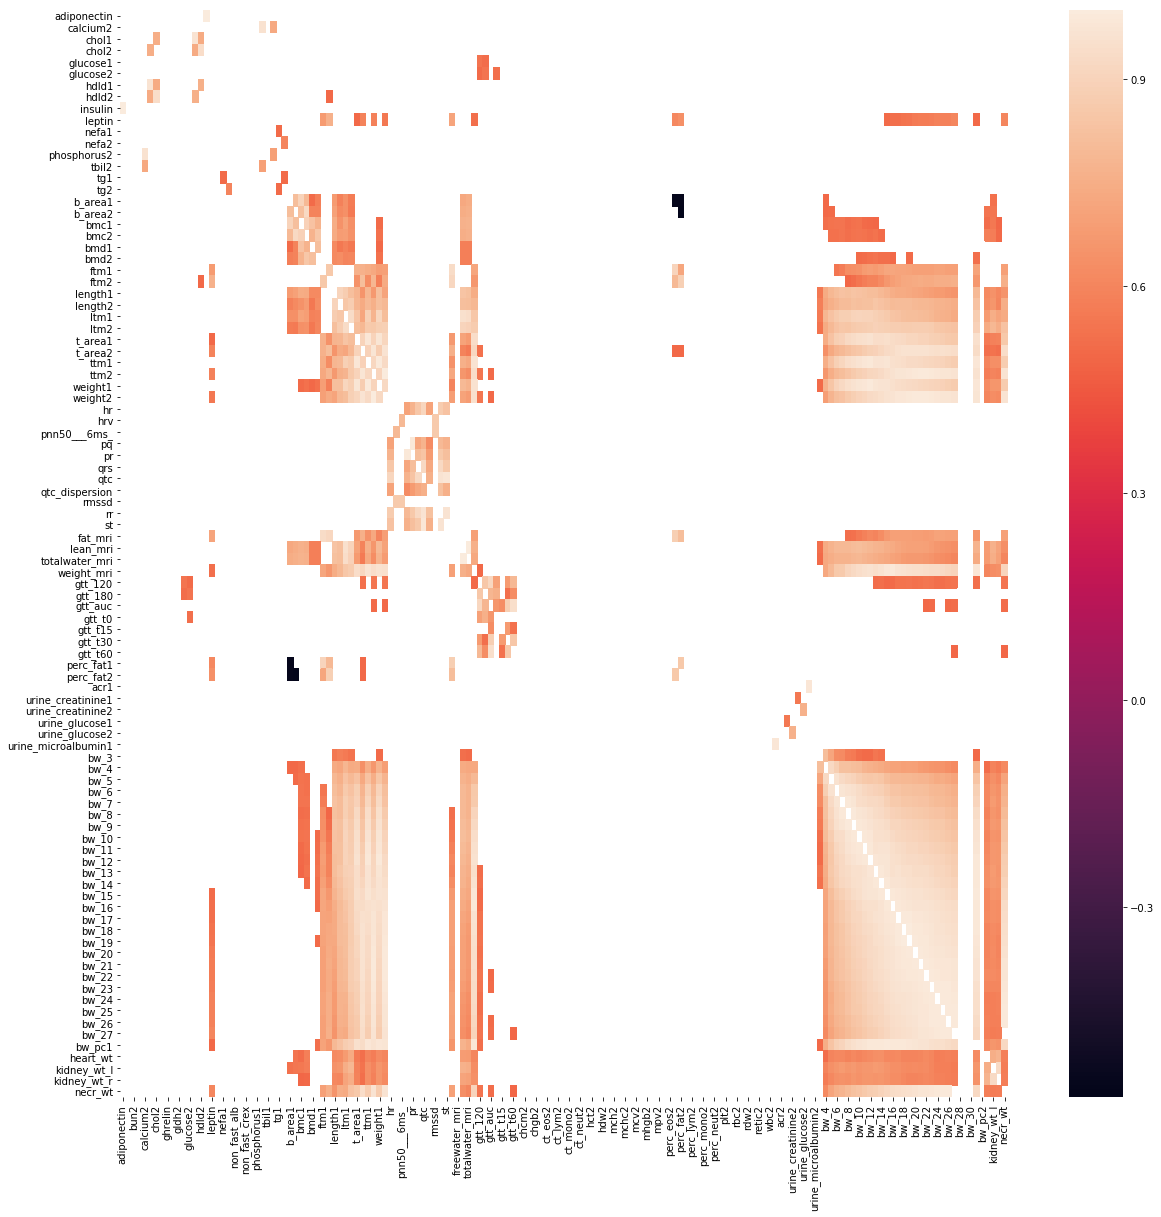

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))

heatmap = sns.heatmap(high_cor, ax = ax)
heatmap.figure

In [7]:
corr_mat["weight1"][corr_mat["weight1"].abs() > 0.5]

bmc1              0.509446
bmc2              0.532110
bmd1              0.504385
bmd2              0.531755
ftm1              0.691324
ftm2              0.580622
length1           0.819920
length2           0.819695
ltm1              0.910640
ltm2              0.881007
t_area1           0.970778
t_area2           0.875365
ttm1              0.993827
ttm2              0.904466
weight1           1.000000
weight2           0.922716
fat_mri           0.597740
lean_mri          0.795066
totalwater_mri    0.771027
weight_mri        0.959498
bw_3              0.513919
bw_4              0.768343
bw_5              0.846041
bw_6              0.899172
bw_7              0.920094
bw_8              0.945226
bw_9              0.960709
bw_10             0.971666
bw_11             0.978973
bw_12             0.988573
bw_13             0.971431
bw_14             0.967869
bw_15             0.968405
bw_16             0.951587
bw_17             0.942678
bw_18             0.934392
bw_19             0.926764
b

In [8]:
# We are going to test the base phenotype model using insulin and leptin on svenson data 
phenotype_1 = "weight1"
phenotype_2 = "length1"

print("The correlation between %s and %s is %f" % (phenotype_1, phenotype_2, corr_mat[phenotype_1][phenotype_2]))

The correlation between weight1 and length1 is 0.819920


In [9]:
phenotype_list = [phenotype_1, phenotype_2]

In [10]:
geno_select, pheno_select = select_phenotype_multiple_phenotypes(geno_df, pheno_df, phenotype_list = phenotype_list)


These samples are missing phenotypes:
[]
(77725, 187)
(5145, 187)
(187, 2)


In [11]:
# separate training and test dataset 
missing_rate = 0.1
geno_tr, pheno_tr, geno_test, pheno_test = separate_training_test(geno_select, pheno_select, missing_rate = missing_rate)

print(pheno_tr)

print(pheno_select)

print(pheno_df[phenotype_1][1:10])
print(pheno_df[phenotype_2])

        weight1  length1
sample                  
F326      22.05      8.2
F327      23.90      8.1
F329      23.50      8.5
F330      25.10      9.0
F331      23.72      8.5
F332      19.10      8.0
F333      21.36      8.9
F334      24.96      8.3
F335      17.16      7.8
F336      25.08      8.4
F337      26.57      8.5
F338      32.82      8.9
F340      31.66      9.1
F342      24.32      8.2
F343      27.89      8.8
F344      28.86      9.1
F345      24.20      8.5
F346      18.40      8.2
F347      27.21      8.5
F348      19.06      8.2
F349      27.73      8.9
F350      24.36      8.5
F351      29.91      9.0
F352      28.22      8.5
F353      21.81      9.1
F354      19.55      7.8
F355      32.51      8.8
F356      29.06      8.3
F357      24.66      8.2
F358      22.51      8.2
...         ...      ...
M383      32.48      9.0
M385      31.74      9.1
M386      34.47      9.3
M387      27.05      8.7
M388      27.97      9.1
M389      42.23      9.8
M390      31.32      9.1


In [12]:
import statsmodels.api as sm

lm = sm.OLS(pheno_tr[phenotype_2], pheno_tr[phenotype_1]).fit()
lm.summary()

#lm = sm.OLS(pheno_df[phenotype_2], pheno_df[phenotype_1]).fit()
#lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                length1   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     5603.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          1.65e-131
Time:                        15:12:27   Log-Likelihood:                -311.23
No. Observations:                 170   AIC:                             624.5
Df Residuals:                     169   BIC:                             627.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight1        0.2890      0.004     74.854      0.000       0.281       0.297
==============================================================================
Omnibus:                        7.548   Durbin-Watson:                   1.073
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.805
Skew:                          -0.501   Prob(JB):                       0.0202
Kurtosis:                       2.688   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pheno_tr[phenotype_2]

sample
F326    8.2
F327    8.1
F329    8.5
F330    9.0
F331    8.5
F332    8.0
F333    8.9
F334    8.3
F335    7.8
F336    8.4
F337    8.5
F338    8.9
F340    9.1
F342    8.2
F343    8.8
F344    9.1
F345    8.5
F346    8.2
F347    8.5
F348    8.2
F349    8.9
F350    8.5
F351    9.0
F352    8.5
F353    9.1
F354    7.8
F355    8.8
F356    8.3
F357    8.2
F358    8.2
       ... 
M383    9.0
M385    9.1
M386    9.3
M387    8.7
M388    9.1
M389    9.8
M390    9.1
M391    9.0
M393    8.6
M394    9.3
M395    9.0
M396    8.6
M398    8.9
M399    8.2
M400    9.8
M402    9.5
M405    9.4
M406    9.5
M407    8.1
M408    9.1
M409    9.1
M411    8.7
M416    8.2
M418    9.1
M419    9.3
M420    9.1
M421    9.2
M422    8.3
M423    9.2
M424    9.4
Name: length1, Length: 170, dtype: float64

In [19]:
predictions = lm.predict(pheno_test[phenotype_1])

In [20]:
predictions

sample
F339     7.951591
F341    10.151213
F378     8.165483
F379     6.624881
F391     7.148050
F424     9.229164
M348     9.388138
M350     9.075971
M357    12.223656
M359     7.309914
M384     7.575834
M392    10.047157
M397     9.417042
M403    11.350744
M410     8.651077
M415     9.445947
M417     9.070190
dtype: float64

In [21]:
pheno_test[phenotype_2]

sample
F339    8.8
F341    9.0
F378    8.9
F379    8.5
F391    8.5
F424    8.8
M348    9.0
M350    8.9
M357    9.4
M359    8.1
M384    8.5
M392    9.0
M397    9.5
M403    9.2
M410    9.0
M415    9.1
M417    9.2
Name: length1, dtype: float64

In [28]:
error = predictions - pheno_test[phenotype_2]

print(error)
print(sum(error**2) /len(error)  )

sample
F339   -0.848409
F341    1.151213
F378   -0.734517
F379   -1.875119
F391   -1.351950
F424    0.429164
M348    0.388138
M350    0.175971
M357    2.823656
M359   -0.790086
M384   -0.924166
M392    1.047157
M397   -0.082958
M403    2.150744
M410   -0.348923
M415    0.345947
M417   -0.129810
dtype: float64
1.396058650649183


In [31]:
from sklearn.metrics import r2_score
r2_score(pheno_test[phenotype_1], pheno_test[phenotype_2])

-20.00337836730894